In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/dissertation/apr/2

/content/gdrive/MyDrive/dissertation/apr/2


In [3]:
!ls

aes_cbc_reviews2.csv	  aes_reviews2_dfleft.csv
aes_cbc_TrainingData.csv  aes_td_dfleft.csv


In [4]:
# -*- coding: utf-8 -*-
# Load libraries
import numpy as np
from pickle import dump
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras.models import Model
import numpy as np
from numpy import loadtxt
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import pickle

In [5]:
#Please add the validation datapath
url="aes_cbc_reviews2.csv"

dataset=pd.read_csv(url)

In [6]:
dataset.head()

,Unnamed: 0,Text,class
0,0,493bc4b56b5dbd73a345804d486d2db19ae6d5f14732c1...,0
1,1,354e6d424634464b7779384d644a54546662335a747066...,1
2,2,64364d523352352b71596e30355673353364364a444268...,1
3,3,7c47862dea1fa68dfbefc0712c81ddc5da8832049cdd5d...,0
4,4,e2ec584bcec81ef92fa9c7486eb65bde9de8644619e8b7...,0


In [7]:
dataset.columns = ['CID', 'Text', 'class']

In [8]:
# dataset.drop(columns=['length'], axis=1, inplace=True)

In [9]:
dataset = dataset.sample(frac=1)#shuffles the rows
dataset.head()

,CID,Text,class
18816,18816,635a475a62385077464e2b4c49786f39554b6646425876...,1
22076,22076,953e02d9bdad2aeedda1fb5feaf4fd01f6f2625ecd1616...,0
16506,16506,6e4a65432b743269344a7238446534304b734e44706653...,1
10798,10798,6677633546316e2f697551442f626b3275797033434679...,1
19978,19978,526e475137573371795253564e4d626a75713549764775...,1


In [10]:
arr4 = dataset['Text'].tolist()

arr1 = dataset['CID'].tolist()

arr2 = dataset['class'].tolist()

#print(arr2)

In [11]:
set(arr2)

{0, 1}

In [12]:
#random array of 5 elements
# np.random.randint(1,100,5)

##Illustration of working of dataset.sample(frac=1).
Run the following two cells to see how rows are getting shuffled

In [13]:
# data = {
#   "calories": np.random.randint(1,100,10),
#   "duration": np.random.randint(1,100,10),
#   "abcd": np.random.randint(1,100,10)
# }
# df = pd.DataFrame(data)
# df

In [14]:
# df = df.sample(frac=1)
# df

In [15]:
# dataset

In [16]:
# int(arr4[0], 16)
len(arr4)

25000

In [17]:
for i in range(len(arr4)):
  arr4[i] = int(arr4[i],16)#converting each of the text into hexadecimal format

li_of_li = []
for i in range(len(arr4)):
  str1 = str(arr4[i])
  n = 17
  chunks = [str1[i:i+n] for i in range(0, 17*4, n)]
  chunks.insert(0,arr1[i])#before chunks we are inserting CID
  chunks.append(arr2[i])#after chuncks, we are appending class-label
  li_of_li.append(chunks)

In [18]:
len(li_of_li[0])

6

In [19]:
# df = pd.DataFrame(li_of_li, columns = ['CID',
# 'Text1', 'Text2', 'Text3', 'Text4', 'Text5', 'Text6', 'Text7', 'Text8', 'Text9', 'Text10', 
# 'Text11', 'Text12', 'Text13', 'Text14', 'Text15', 'Text16', 'Text17', 'Text18', 'Text19', 'Text20',
# 'Text21', 'Text22', 'Text23', 'Text24', 'Text25', 'Text26', 'Text27', 'Text28', 'Text29', 'Text30', 
# 'Text31', 'Text32', 'Text33', 'Text34', 'Text35', 'Text36', 'Text37', 'Text38', 'Text39', 'Text40', 
# 'Text41', 'Text42', 'Text43', 'Text44', 'Text45', 'Text46', 'Text47', 'Text48', 'Text49', 'Text50', 
# 'Text51', 'Text52', 'Text53', 'Text54', 'Text55', 'Text56', 'Text57', 'Text58', 'Text59', 'Text60',
# 'Text61', 'Text62', 'Text63', 'Text64', 'Text65', 'Text66', 'Text67', 'Text68', 'Text69', 'Text70', 
# 'Text71', 'Text72', 'Text73', 'Text74', 'Text75', 'Text76', 'Text77', 'Text78', 'Text79', 'Text80', 
# 'Text81', 'Text82', 'Text83', 'Text84', 'Text85', 'Text86', 'Text87', 'Text88', 'Text89', 'Text90', 
# 'Text91', 'Text92', 'Text93', 'Text94', 'Text95', 'Text96', 'Text97', 'Text98', 'Text99', 'Text100',
# 'Text101', 'Text102', 'Text103', 'Text104', 'Text105', 'Text106', 'Text107', 'Text108', 'Text109', 'Text110', 
# 'Text111', 'Text112', 'Text113', 'Text114', 'Text115', 'Text116', 'Text117', 'Text118', 'Text119', 'Text120', 
# 'Text121', 'Text122', 'Text123', 'Text124', 'Text125', 'Text126', 'Text127', 'Text128', 'Text129', 'Text130',
# 'Text131', 'Text132', 'Text133', 'Text134', 'Text135', 'Text136', 'Text137', 'Text138', 'Text139', 'Text140', 
# 'Text141', 'Text142', 'Text143', 'Text144',
# 'class'])

df = pd.DataFrame(li_of_li, columns = ['CID', 'Text1', 'Text2', 'Text3', 'Text4', 'class'])



In [20]:
df.head()

,CID,Text1,Text2,Text3,Text4,class
0,18816,67438019480142570,85726683125629172,26718720872945433,75894239841198526,1
1,22076,10130178061070093,66758982403087990,48753288224503453,02927702665657831,0
2,16506,74862422413167986,62011830470110300,37574236732436222,69336182004529919,1
3,10798,69551523069460963,86682561779565946,88673377876419971,59050180386877723,1
4,19978,55951886415218677,89304791613551470,24319438359401350,98133485682405043,1


In [21]:
# df.dropna(inplace=True)

In [22]:
df.head()

,CID,Text1,Text2,Text3,Text4,class
0,18816,67438019480142570,85726683125629172,26718720872945433,75894239841198526,1
1,22076,10130178061070093,66758982403087990,48753288224503453,02927702665657831,0
2,16506,74862422413167986,62011830470110300,37574236732436222,69336182004529919,1
3,10798,69551523069460963,86682561779565946,88673377876419971,59050180386877723,1
4,19978,55951886415218677,89304791613551470,24319438359401350,98133485682405043,1


In [23]:
df['class'].value_counts()

1    12500
0    12500
Name: class, dtype: int64

In [24]:
df.shape

(25000, 6)

In [25]:
# pd.to_numeric(df['Text1'])

In [26]:
C1= pd.to_numeric(df['Text1']) 
C1=C1.to_numpy()
C2= pd.to_numeric(df['Text2']) 
C2=C2.to_numpy()
C3= pd.to_numeric(df['Text3']) 
C3=C3.to_numpy()
C4= pd.to_numeric(df['Text4']) 
C4=C4.to_numpy()
# C5= pd.to_numeric(df['Text5']) 
# C5=C5.to_numpy()
# C6= pd.to_numeric(df['Text6']) 
# C6=C6.to_numpy()
# C7= pd.to_numeric(df['Text7']) 
# C7=C7.to_numpy()
# C8= pd.to_numeric(df['Text8']) 
# C8=C8.to_numpy()
# C9= pd.to_numeric(df['Text9']) 
# C9=C9.to_numpy()
# C10= pd.to_numeric(df['Text10']) 
# C10=C10.to_numpy()
# C11= pd.to_numeric(df['Text11']) 
# C11=C11.to_numpy()
# C12= pd.to_numeric(df['Text12']) 
# C12=C12.to_numpy()
# C13= pd.to_numeric(df['Text13']) 
# C13=C13.to_numpy()
# C14= pd.to_numeric(df['Text14']) 
# C14=C14.to_numpy()
# C15= pd.to_numeric(df['Text15']) 
# C15=C15.to_numpy()
# C16= pd.to_numeric(df['Text16']) 
# C16=C16.to_numpy()
# C17= pd.to_numeric(df['Text17']) 
# C17=C17.to_numpy()
# C18= pd.to_numeric(df['Text18']) 
# C18=C18.to_numpy()
# C19= pd.to_numeric(df['Text19']) 
# C19=C19.to_numpy()
# C20= pd.to_numeric(df['Text20']) 
# C20=C20.to_numpy()
# C21= pd.to_numeric(df['Text21']) 
# C21=C21.to_numpy()
# C22= pd.to_numeric(df['Text22']) 
# C22=C22.to_numpy()
# C23= pd.to_numeric(df['Text23']) 
# C23=C23.to_numpy()
# C24= pd.to_numeric(df['Text24']) 
# C24=C24.to_numpy()
# C25= pd.to_numeric(df['Text25']) 
# C25=C25.to_numpy()
# C26= pd.to_numeric(df['Text26']) 
# C26=C26.to_numpy()
# C27= pd.to_numeric(df['Text27']) 
# C27=C27.to_numpy()
# C28= pd.to_numeric(df['Text28']) 
# C28=C28.to_numpy()
# C29= pd.to_numeric(df['Text29']) 
# C29=C29.to_numpy()
# C30= pd.to_numeric(df['Text30']) 
# C30=C30.to_numpy()
# C31= pd.to_numeric(df['Text31']) 
# C31=C31.to_numpy()
# C32= pd.to_numeric(df['Text32']) 
# C32=C32.to_numpy()
# C33= pd.to_numeric(df['Text33']) 
# C33=C33.to_numpy()
# C34= pd.to_numeric(df['Text34']) 
# C34=C34.to_numpy()
# C35= pd.to_numeric(df['Text35']) 
# C35=C35.to_numpy()
# C36= pd.to_numeric(df['Text36']) 
# C36=C36.to_numpy()
# C37= pd.to_numeric(df['Text37']) 
# C37=C37.to_numpy()
# C38= pd.to_numeric(df['Text38']) 
# C38=C38.to_numpy()
# C39= pd.to_numeric(df['Text39']) 
# C39=C39.to_numpy()
# C40= pd.to_numeric(df['Text40']) 
# C40=C40.to_numpy()
# C41= pd.to_numeric(df['Text41']) 
# C41=C41.to_numpy()
# C42= pd.to_numeric(df['Text42']) 
# C42=C42.to_numpy()
# C43= pd.to_numeric(df['Text43']) 
# C43=C43.to_numpy()
# C44= pd.to_numeric(df['Text44']) 
# C44=C44.to_numpy()
# C45= pd.to_numeric(df['Text45']) 
# C45=C45.to_numpy()
# C46= pd.to_numeric(df['Text46']) 
# C46=C46.to_numpy()
# C47= pd.to_numeric(df['Text47']) 
# C47=C47.to_numpy()
# C48= pd.to_numeric(df['Text48']) 
# C48=C48.to_numpy()
# C49= pd.to_numeric(df['Text49']) 
# C49=C49.to_numpy()
# C50= pd.to_numeric(df['Text50']) 
# C50=C50.to_numpy()
# C51= pd.to_numeric(df['Text51']) 
# C51=C51.to_numpy()
# C52= pd.to_numeric(df['Text52']) 
# C52=C52.to_numpy()
# C53= pd.to_numeric(df['Text53']) 
# C53=C53.to_numpy()
# C54= pd.to_numeric(df['Text54']) 
# C54=C54.to_numpy()
# C55= pd.to_numeric(df['Text55']) 
# C55=C55.to_numpy()
# C56= pd.to_numeric(df['Text56']) 
# C56=C56.to_numpy()
# C57= pd.to_numeric(df['Text57']) 
# C57=C57.to_numpy()
# C58= pd.to_numeric(df['Text58']) 
# C58=C58.to_numpy()
# C59= pd.to_numeric(df['Text59']) 
# C59=C59.to_numpy()
# C60= pd.to_numeric(df['Text60']) 
# C60=C60.to_numpy()
# C61= pd.to_numeric(df['Text61']) 
# C61=C61.to_numpy()
# C62= pd.to_numeric(df['Text62']) 
# C62=C62.to_numpy()
# C63= pd.to_numeric(df['Text63']) 
# C63=C63.to_numpy()
# C64= pd.to_numeric(df['Text64']) 
# C64=C64.to_numpy()
# C65= pd.to_numeric(df['Text65']) 
# C65=C65.to_numpy()
# C66= pd.to_numeric(df['Text66']) 
# C66=C66.to_numpy()
# C67= pd.to_numeric(df['Text67']) 
# C67=C67.to_numpy()
# C68= pd.to_numeric(df['Text68']) 
# C68=C68.to_numpy()
# C69= pd.to_numeric(df['Text69']) 
# C69=C69.to_numpy()
# C70= pd.to_numeric(df['Text70']) 
# C70=C70.to_numpy()
# C71= pd.to_numeric(df['Text71']) 
# C71=C71.to_numpy()
# C72= pd.to_numeric(df['Text72']) 
# C72=C72.to_numpy()
# C73= pd.to_numeric(df['Text73']) 
# C73=C73.to_numpy()
# C74= pd.to_numeric(df['Text74']) 
# C74=C74.to_numpy()
# C75= pd.to_numeric(df['Text75']) 
# C75=C75.to_numpy()
# C76= pd.to_numeric(df['Text76']) 
# C76=C76.to_numpy()
# C77= pd.to_numeric(df['Text77']) 
# C77=C77.to_numpy()
# C78= pd.to_numeric(df['Text78']) 
# C78=C78.to_numpy()
# C79= pd.to_numeric(df['Text79']) 
# C79=C79.to_numpy()
# C80= pd.to_numeric(df['Text80']) 
# C80=C80.to_numpy()
# C81= pd.to_numeric(df['Text81']) 
# C81=C81.to_numpy()
# C82= pd.to_numeric(df['Text82']) 
# C82=C82.to_numpy()
# C83= pd.to_numeric(df['Text83']) 
# C83=C83.to_numpy()
# C84= pd.to_numeric(df['Text84']) 
# C84=C84.to_numpy()
# C85= pd.to_numeric(df['Text85']) 
# C85=C85.to_numpy()
# C86= pd.to_numeric(df['Text86']) 
# C86=C86.to_numpy()
# C87= pd.to_numeric(df['Text87']) 
# C87=C87.to_numpy()
# C88= pd.to_numeric(df['Text88']) 
# C88=C88.to_numpy()
# C89= pd.to_numeric(df['Text89']) 
# C89=C89.to_numpy()
# C90= pd.to_numeric(df['Text90']) 
# C90=C90.to_numpy()
# C91= pd.to_numeric(df['Text91']) 
# C91=C91.to_numpy()
# C92= pd.to_numeric(df['Text92']) 
# C92=C92.to_numpy()
# C93= pd.to_numeric(df['Text93']) 
# C93=C93.to_numpy()
# C94= pd.to_numeric(df['Text94']) 
# C94=C94.to_numpy()
# C95= pd.to_numeric(df['Text95']) 
# C95=C95.to_numpy()
# C96= pd.to_numeric(df['Text96']) 
# C96=C96.to_numpy()
# C97= pd.to_numeric(df['Text97']) 
# C97=C97.to_numpy()
# C98= pd.to_numeric(df['Text98']) 
# C98=C98.to_numpy()
# C99= pd.to_numeric(df['Text99']) 
# C99=C99.to_numpy()
# C100= pd.to_numeric(df['Text100']) 
# C100=C100.to_numpy()
# C101= pd.to_numeric(df['Text101']) 
# C101=C101.to_numpy()
# C102= pd.to_numeric(df['Text102']) 
# C102=C102.to_numpy()
# C103= pd.to_numeric(df['Text103']) 
# C103=C103.to_numpy()
# C104= pd.to_numeric(df['Text104']) 
# C104=C104.to_numpy()
# C105= pd.to_numeric(df['Text105']) 
# C105=C105.to_numpy()
# C106= pd.to_numeric(df['Text106']) 
# C106=C106.to_numpy()
# C107= pd.to_numeric(df['Text107']) 
# C107=C107.to_numpy()
# C108= pd.to_numeric(df['Text108']) 
# C108=C108.to_numpy()
# C109= pd.to_numeric(df['Text109']) 
# C109=C109.to_numpy()
# C110= pd.to_numeric(df['Text110']) 
# C110=C110.to_numpy()
# C111= pd.to_numeric(df['Text111']) 
# C111=C111.to_numpy()
# C112= pd.to_numeric(df['Text112']) 
# C112=C112.to_numpy()
# C113= pd.to_numeric(df['Text113']) 
# C113=C113.to_numpy()
# C114= pd.to_numeric(df['Text114']) 
# C114=C114.to_numpy()
# C115= pd.to_numeric(df['Text115']) 
# C115=C115.to_numpy()
# C116= pd.to_numeric(df['Text116']) 
# C116=C116.to_numpy()
# C117= pd.to_numeric(df['Text117']) 
# C117=C117.to_numpy()
# C118= pd.to_numeric(df['Text118']) 
# C118=C118.to_numpy()
# C119= pd.to_numeric(df['Text119']) 
# C119=C119.to_numpy()
# C120= pd.to_numeric(df['Text120']) 
# C120=C120.to_numpy()
# C121= pd.to_numeric(df['Text121']) 
# C121=C121.to_numpy()
# C122= pd.to_numeric(df['Text122']) 
# C122=C122.to_numpy()
# C123= pd.to_numeric(df['Text123']) 
# C123=C123.to_numpy()
# C124= pd.to_numeric(df['Text124']) 
# C124=C124.to_numpy()
# C125= pd.to_numeric(df['Text125']) 
# C125=C125.to_numpy()
# C126= pd.to_numeric(df['Text126']) 
# C126=C126.to_numpy()
# C127= pd.to_numeric(df['Text127']) 
# C127=C127.to_numpy()
# C128= pd.to_numeric(df['Text128']) 
# C128=C128.to_numpy()
# C129= pd.to_numeric(df['Text129']) 
# C129=C129.to_numpy()
# C130= pd.to_numeric(df['Text130']) 
# C130=C130.to_numpy()
# C131= pd.to_numeric(df['Text131']) 
# C131=C131.to_numpy()
# C132= pd.to_numeric(df['Text132']) 
# C132=C132.to_numpy()
# C133= pd.to_numeric(df['Text133']) 
# C133=C133.to_numpy()
# C134= pd.to_numeric(df['Text134']) 
# C134=C134.to_numpy()
# C135= pd.to_numeric(df['Text135']) 
# C135=C135.to_numpy()
# C136= pd.to_numeric(df['Text136']) 
# C136=C136.to_numpy()
# C137= pd.to_numeric(df['Text137']) 
# C137=C137.to_numpy()
# C138= pd.to_numeric(df['Text138']) 
# C138=C138.to_numpy()
# C139= pd.to_numeric(df['Text139']) 
# C139=C139.to_numpy()
# C140= pd.to_numeric(df['Text140']) 
# C140=C140.to_numpy()
# C141= pd.to_numeric(df['Text141']) 
# C141=C141.to_numpy()
# C142= pd.to_numeric(df['Text142']) 
# C142=C142.to_numpy()

# C = [C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100,C101,C102,C103,C104,C105,C106,C107,C108,C109,C110,C111,C112,C113,C114,C115,C116,C117,C118,C119,C120,C121,C122,C123,C124,C125,C126,C127,C128,C129,C130,C131,C132,C133,C134,C135,C136,C137,C138,C139,C140,C141,C142]
C = [C1,C2,C3,C4]

Y = df['class'].to_numpy()
Y = Y.astype(int)

In [27]:
# len(C), len(C[0])

In [28]:
def WORD_SIZE():
  return(32);
def convert_to_binary(arr):
  X1 = np.zeros((4 * WORD_SIZE(),len(arr[0])),dtype=np.uint8);
  for i in range(4 * WORD_SIZE()):
    index = i // WORD_SIZE();
    #print(index)
    offset = WORD_SIZE() - (i % WORD_SIZE()) - 1;
    X1[i] = ((arr[index]) >> offset) & 1;#they are only considering starting 4 chunks of arr i.e., C
    #print(f"X1[{i}]",X1[i], len(X1[i]))
    
  #print(X1)
  X1 = X1.transpose();
  
  return(X1);

X=convert_to_binary(C)



In [29]:
# C[0], (C[0]>>1)&1

In [30]:
X.shape

(25000, 128)

In [31]:
import numpy as np
seed=9
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20,random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50,random_state=seed)

# len(X_test)

X_train = X_train[..., np.newaxis]
#X_test = X[..., np.newaxis]

X_train = X_train[..., np.newaxis]
#X_test = X_test[..., np.newaxis]

In [32]:
X_val = X_val[..., np.newaxis]
X_val = X_val[..., np.newaxis]

X_test = X_test[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [33]:
#Please add the model datapath
url="/content/gdrive/MyDrive/dissertation/random_vs_DES/tl/CRL_Best_V1.h5"

In [34]:
#len(X_test)
from keras.models import load_model
model = load_model(url)

In [35]:
# model.summary()

In [36]:
# model.get_layer("dense").get_config()

In [37]:
xa = model.layers[-2].output
# xb = Dense(units=512, activation='sigmoid')(xa)
# xc = Dense(units=128, activation='sigmoid')(xb)
# xd = Dense(units=32, activation='sigmoid')(xc)
#xe = Dense(units=4, activation='relu')(xa)
output = Dense(units=2, activation='softmax')(xa)

In [38]:
from keras.models import Model
new_model = Model(inputs=model.input, outputs=output)

In [39]:
# model.get_layer("input_1").get_config()

In [40]:
# new_model.summary()

In [41]:
# from keras.utils import plot_model
# plot_model(model, to_file = "hello.png")

In [42]:
len(new_model.layers)

423

In [43]:
# for layer in model.layers[:-100]:
#   layer.trainable=False

In [45]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(x = X_train, y=y_train,epochs=5, verbose=2, validation_data=(X_val, y_val))

new_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
new_model.fit(x = X_train, y=y_train,epochs=5, verbose=2, validation_data=(X_val, y_val))

Epoch 1/5
625/625 - 156s - loss: 0.7001 - accuracy: 0.5005 - val_loss: 0.6997 - val_accuracy: 0.4912 - 156s/epoch - 249ms/step
Epoch 2/5
625/625 - 49s - loss: 0.6847 - accuracy: 0.5531 - val_loss: 0.7142 - val_accuracy: 0.4828 - 49s/epoch - 78ms/step
Epoch 3/5
625/625 - 61s - loss: 0.6337 - accuracy: 0.6424 - val_loss: 0.7838 - val_accuracy: 0.4876 - 61s/epoch - 97ms/step
Epoch 4/5
625/625 - 50s - loss: 0.4871 - accuracy: 0.7628 - val_loss: 0.9150 - val_accuracy: 0.4988 - 50s/epoch - 80ms/step
Epoch 5/5
625/625 - 51s - loss: 0.2889 - accuracy: 0.8794 - val_loss: 1.2806 - val_accuracy: 0.4976 - 51s/epoch - 81ms/step


In [46]:
scores=new_model.predict(X_test)
#scores=model.evaluate(X_test,y_test)

print('Prediction Values:', scores)

#argmax() method 
y_pred_final = [np.argmax(line) for line in scores]

print(y_pred_final)

79/79 [==============================] - 3s 13ms/step
Prediction Values: [[0.9987564  0.00124361]
 [0.0398064  0.96019363]
 [0.0651018  0.9348982 ]
 ...
 [0.3769494  0.62305063]
 [0.11528406 0.884716  ]
 [0.9784839  0.02151615]]
[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [47]:
new_model.evaluate(X_test, y_test)

79/79 [==============================] - 1s 14ms/step - loss: 1.2415 - accuracy: 0.5032


[1.241533637046814, 0.5031999945640564]

In [48]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

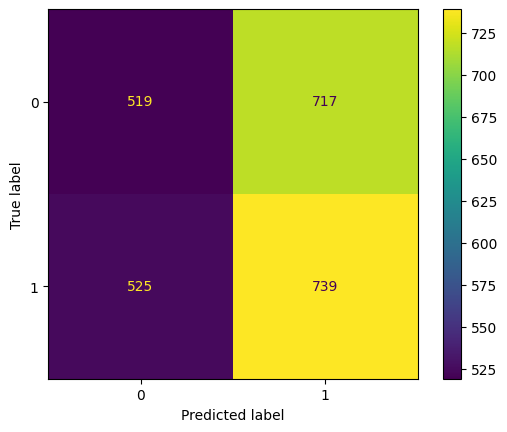

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred_final)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

In [50]:
# type(y_test), len(y_test)

In [51]:
y_pred_final = np.array(y_pred_final)

In [52]:
# y_pred_final[y_pred_final==0]

In [54]:
print("random_accuracy = ", 519/(519+717))
print("AES accuracy = ",739/(739+525))

random_accuracy =  0.4199029126213592
AES accuracy =  0.5846518987341772


In [55]:
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(x = X_train, y=y_train,epochs=5, verbose=2, validation_data=(X_val, y_val))

new_model.compile(loss='sparse_categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
new_model.fit(x = X_train, y=y_train,epochs=5, verbose=2, validation_data=(X_val, y_val))

Epoch 1/5
625/625 - 118s - loss: 0.1267 - accuracy: 0.9513 - val_loss: 1.9860 - val_accuracy: 0.5080 - 118s/epoch - 189ms/step
Epoch 2/5
625/625 - 45s - loss: 0.0860 - accuracy: 0.9675 - val_loss: 2.3158 - val_accuracy: 0.4964 - 45s/epoch - 72ms/step
Epoch 3/5
625/625 - 44s - loss: 0.0778 - accuracy: 0.9704 - val_loss: 2.5842 - val_accuracy: 0.4944 - 44s/epoch - 70ms/step
Epoch 4/5
625/625 - 43s - loss: 0.0735 - accuracy: 0.9729 - val_loss: 2.5293 - val_accuracy: 0.5036 - 43s/epoch - 69ms/step
Epoch 5/5
625/625 - 48s - loss: 0.0695 - accuracy: 0.9736 - val_loss: 2.8091 - val_accuracy: 0.4968 - 48s/epoch - 76ms/step


In [56]:
scores=new_model.predict(X_test)
#scores=model.evaluate(X_test,y_test)

print('Prediction Values:', scores)

#argmax() method 
y_pred_final = [np.argmax(line) for line in scores]

print(y_pred_final)

79/79 [==============================] - 3s 18ms/step
Prediction Values: [[9.9999034e-01 9.7031088e-06]
 [1.5407485e-02 9.8459250e-01]
 [9.6926081e-01 3.0739173e-02]
 ...
 [4.8657559e-02 9.5134240e-01]
 [8.1745274e-02 9.1825473e-01]
 [9.2990851e-01 7.0091426e-02]]
[0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [57]:
new_model.evaluate(X_test, y_test)

79/79 [==============================] - 2s 21ms/step - loss: 2.6185 - accuracy: 0.5080


[2.618459701538086, 0.5080000162124634]

In [58]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

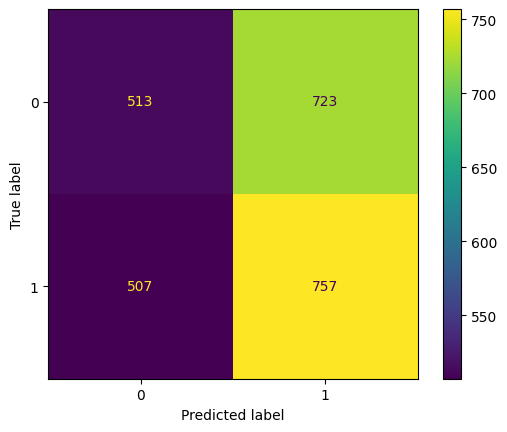

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred_final)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

In [60]:
print("random_accuracy = ", 513/(513+723))
print("AES accuracy = ",757/(757+507))

random_accuracy =  0.41504854368932037
AES accuracy =  0.5988924050632911
